## scipyによる確率分布と特殊関数

### github
- jupyter notebook形式のファイルは[こちら](https://github.com/hiroshi0530/wa-src/blob/master/article/library/scipy/dist/dist_nb.ipynb)

### google colaboratory
- google colaboratory で実行する場合は[こちら](https://colab.research.google.com/github/hiroshi0530/wa-src/blob/master/article/library/scipy/dist/dist_nb.ipynb)

### 筆者の環境
筆者のOSはmacOSです。LinuxやUnixのコマンドとはオプションが異なります。

In [1]:
!sw_vers

ProductName:	Mac OS X
ProductVersion:	10.14.6
BuildVersion:	18G2022


In [2]:
!python -V

Python 3.7.3


基本的なライブラリをインポートしそのバージョンを確認しておきます。

In [3]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import matplotlib
import matplotlib.pyplot as plt
import scipy
import numpy as np

print('matplotlib version :', matplotlib.__version__)
print('scipy version :', scipy.__version__)
print('numpy version :', np.__version__)

matplotlib version : 3.0.3
scipy version : 1.4.1
numpy version : 1.16.2


## 基本的な確率分布

ここではベイズ統計を理解するために必要な基本的な確率分布と必要な特殊関数の説明を行います。基本的な性質をまとめています。また、サンプリングするpythonのコードも示しています。基本的にはscipyモジュールの統計関数を利用するだけです。

### 正規分布

正規分布は最も良く使われる確率分布であり、その詳細は教科書に詳細に書かれているので割愛します。ここではscipyによる利用方法にとどめます。

#### 表式
$
\displaystyle P\left( x \| \mu, \sigma \right) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( - \frac{x-\mu}{2 \sigma^2} \right)
$

#### 平均
$
E\left[x \right]=\mu
$

#### 分散
$
V\left[x\right]=\sigma^2
$

#### 確率密度関数の取得
pythonで正規分布の確率密度関数の生成方法は以下の通りです。中心0、標準偏差1のグラフになります。

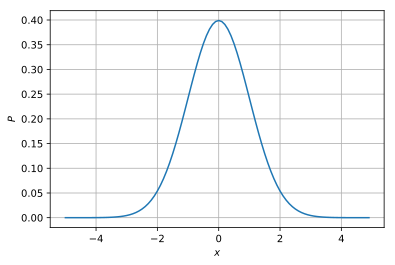

In [4]:
from scipy.stats import norm

mu = 0
sigma = 1

X = np.arange(-5, 5, 0.1)
Y = norm.pdf(X, mu, sigma)

plt.xlabel('$x$')
plt.ylabel('$P$')
plt.grid()
plt.plot(X, Y)

実際に定量的なデータ分析の現場では、確率密度関数自体はそれほど使いません。統計モデリングなどでは、仮定された確率分布からデータを仮想的にサンプリングすることがしばしば行われます。確率分布を仮定した場合のシミュレーションのようなものです。

#### サンプリング
標準正規分布から1000個データをサンプリングして、ヒストグラム表示してみます。ちゃんと確率密度関数を再現できていることがわかります。

(array([  2.,   5.,  13.,  19.,  31.,  53.,  84., 135., 125., 128., 109.,
         97.,  72.,  60.,  33.,  23.,   6.,   4.,   0.,   1.]),
 array([-2.95738832, -2.63844968, -2.31951103, -2.00057238, -1.68163374,
        -1.36269509, -1.04375644, -0.7248178 , -0.40587915, -0.0869405 ,
         0.23199814,  0.55093679,  0.86987544,  1.18881408,  1.50775273,
         1.82669138,  2.14563002,  2.46456867,  2.78350732,  3.10244596,
         3.42138461]),
 <a list of 20 Patch objects>)

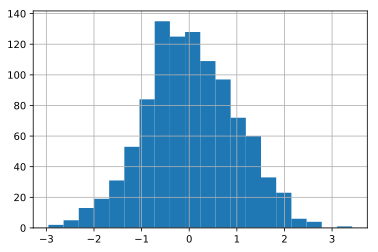

In [65]:
from scipy.stats import norm

mu = 0
sigma = 1

x = norm.rvs(mu, sigma, size=1000)
plt.grid()
plt.hist(x, bins=20)

#### help
これ以外にもscipy.stats.normには様々な関数が用意されています。

```python
norm?
```

これを実行するとどのような関数が用意されているかわかります。
`rvs: random variates`や`pdf : probability density function`、`logpdf`、`cdf : cumulative distribution function`などを利用する場合が多いと思います。

```txt

rvs(loc=0, scale=1, size=1, random_state=None)
    Random variates.
pdf(x, loc=0, scale=1)
    Probability density function.
logpdf(x, loc=0, scale=1)
    Log of the probability density function.
cdf(x, loc=0, scale=1)
    Cumulative distribution function.
logcdf(x, loc=0, scale=1)
    Log of the cumulative distribution function.
sf(x, loc=0, scale=1)
    Survival function  (also defined as ``1 - cdf``, but `sf` is sometimes more accurate).
logsf(x, loc=0, scale=1)
    Log of the survival function.
ppf(q, loc=0, scale=1)
    Percent point function (inverse of ``cdf`` --- percentiles).
isf(q, loc=0, scale=1)
    Inverse survival function (inverse of ``sf``).
moment(n, loc=0, scale=1)
    Non-central moment of order n
stats(loc=0, scale=1, moments='mv')
    Mean('m'), variance('v'), skew('s'), and/or kurtosis('k').
entropy(loc=0, scale=1)
    (Differential) entropy of the RV.
fit(data, loc=0, scale=1)
    Parameter estimates for generic data.
expect(func, args=(), loc=0, scale=1, lb=None, ub=None, conditional=False, **kwds)
    Expected value of a function (of one argument) with respect to the distribution.
median(loc=0, scale=1)
    Median of the distribution.
mean(loc=0, scale=1)
    Mean of the distribution.
var(loc=0, scale=1)
    Variance of the distribution.
std(loc=0, scale=1)
    Standard deviation of the distribution.
interval(alpha, loc=0, scale=1)
    Endpoints of the range that contains alpha percent of the distribution

```

### ベルヌーイ分布
 コイン投げにおいて、表、もしくは裏が出る分布のように、試行の結果が2通りしか存在しない場合の分布を決定します。

#### 表式
$
P\left( x \| \mu \right) = \mu^{x}\left(1-\mu \right)^{1-x} \quad \left(x = 0 \text{ or }1 \right) 
$

もしくは、

<div>
$$
 P\left(x | \mu \right)= \begin{cases}
   1 - \mu &\text{if } x = 0 \\
   \mu &\text{if } x = 1
\end{cases}
$$
</div>

となります。$x$が0か1しか取らないことに注意してください。

#### 平均
$
E\left[x \right]=\mu
$

#### 分散
$
V\left[x\right]=\mu\left(1-\mu \right)
$
#### 確率質量関数

In [10]:
from scipy.stats import bernoulli

mu=0.3

print(bernoulli.pmf(0, mu))
print(bernoulli.pmf(1, mu))

0.7000000000000001
0.3


#### サンプリング
1000個サンプリングして、ヒストグラムで表示してみます。

(array([716.,   0., 284.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

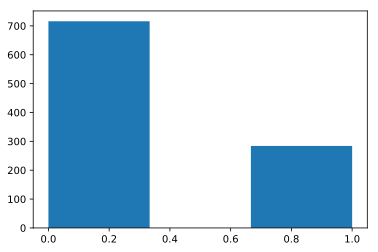

In [64]:
from scipy.stats import bernoulli

mu=0.3
size=1000

x = bernoulli.rvs(mu, size=size)
plt.hist(x, bins=3)

### 二項分布
コイン投げを複数回行った結果、表が出来る回数の確率が従う分布になります。回数が1の時はベルヌーイ分布に一致します。$n$がコインを投げる回数、$p$が表が出る確率、$k$が表が出る回数で確率変数になります。詳細な計算は別途教科書を参照してください。

#### 表式
$ \displaystyle
P\left(k | n,p \right) = \frac{n!}{k!\left(n-k \right)!} p^{k}\left( 1-p\right)^{n-k}
$

#### 平均
$ \displaystyle
E\left[k \right] = np
$

#### 分散
$ \displaystyle
V\left[k \right] = np\left(1-p \right) 
$

#### 確率質量関数

$p=0.3, 0.5, 0.9$の場合の二項分布の確率質量関数になります。

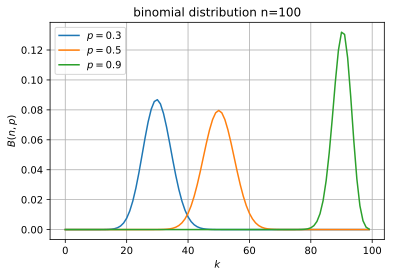

In [33]:
import numpy as np
import scipy
from scipy.stats import binom
import matplotlib.pyplot as plt

n = 100
x = np.arange(n)

# case.1
p = 0.3
y1 = binom.pmf(x,n,p)

# case.2
p = 0.5
y2 = binom.pmf(x,n,p)

# case.3
p = 0.9
y3 = binom.pmf(x,n,p)

# fig, ax = plt.subplots(facecolor="w")
plt.plot(x, y1, label="$p=0.3$")
plt.plot(x, y2, label="$p=0.5$")
plt.plot(x, y3, label="$p=0.9$")

plt.xlabel('$k$')
plt.ylabel('$B(n,p)$')
plt.title('binomial distribution n={}'.format(n))
plt.grid(True)

plt.legend()

#### サンプリング

(array([   8.,   39.,  111.,  592.,  914., 1355., 2495., 1630., 1256.,
        1069.,  317.,  146.,   54.,    9.,    5.]),
 array([14.        , 16.33333333, 18.66666667, 21.        , 23.33333333,
        25.66666667, 28.        , 30.33333333, 32.66666667, 35.        ,
        37.33333333, 39.66666667, 42.        , 44.33333333, 46.66666667,
        49.        ]),
 <a list of 15 Patch objects>)

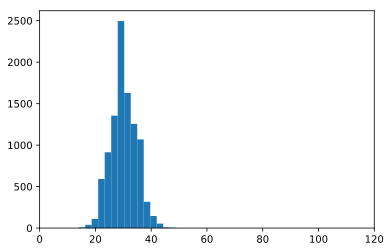

In [37]:
from scipy.stats import binom

n = 100
p = 0.3

x = binom.rvs(n,p,size=10000)

plt.xlim(0,120)
plt.hist(x,bins=15)

### カテゴリ分布
ベルヌーイ分布の多変数化になります。


#### 表式

#### 平均
$ \displaystyle
E\left[x \right] = 
$

#### 分散
$ \displaystyle
V\left[x \right] = 
$


#### 確率質量関数

### 多項分布
二項分布の多変数版です。いかさまの可能性があるサイコロを複数回振って、それぞれの目が出る回数が従う確率分布になります。サイコロの面が$n$個あり、それぞれが一回の試行で出る確率が$p_1,p_2, \cdots , p_n$で、$N$回そのサイコロを振ったとき、それぞれの面が出る確率を$x_1,x_2, \cdots , x_n$とします。

#### 表式
$ \displaystyle
P\left(x_1, x_2, \cdots x_n | n,p_1,p_2 \cdots p_n \right) = \frac{N!}{x_1!x_2! \cdots x_n!} p_1^{x_1}p_2^{x_2}\cdots p_n^{x_n}
$

ただし、$p_i$と$x_i$は $ \displaystyle \sum_i p_i = 1 , \sum_i x_i = N $を満たす。

#### 平均
$ \displaystyle
E\left[x_i \right] = Np_i 
$

#### 分散
$ \displaystyle
V\left[x_i \right] = Np_i\left(1-p_i \right) 
$

#### 確率質量関数
6面体のサイコロで、1から6それぞれの目が出る確率は、$0.1,0.2,0.25,0.15,0.2,01$とします。そのサイコロを10回振って、それぞれの目が1回,2回,1回,3回,2回,1回出る確率を計算します。

In [48]:
from scipy.stats import multinomial

rv = multinomial(10,[0.1,0.2,0.25,0.15,0.2,0.1])
print('確率 : ',str(rv.pmf([1,2,1,3,2,1]))[:8])

確率 :  0.002041


#### サンプリング
上記のサイコロを10回投げて、それぞれの目が出る回数をサンプリングします。とりあえず一回だけサンプリングしてみます。

In [52]:
multinomial.rvs(10, [0.1,0.2,0.25,0.15,0.2,0.1], size=1)

array([[2, 2, 2, 1, 2, 1]])

10000回サンプリングしてみます。

In [60]:
from collections import Counter

array = multinomial.rvs(10, [0.1,0.2,0.25,0.15,0.2,0.1], size=10000)
array = map(str, array)

print('出現する上位10個のデータ')
for i in Counter(array).most_common()[:10]:
  print(i)

上位10個の
('[1 2 3 1 2 1]', 54)
('[0 2 3 2 2 1]', 51)
('[1 2 2 2 2 1]', 50)
('[1 3 2 1 2 1]', 50)
('[0 3 3 1 2 1]', 46)
('[1 1 2 2 3 1]', 45)
('[1 3 3 1 1 1]', 44)
('[1 1 3 2 2 1]', 44)
('[1 2 4 1 2 0]', 43)
('[1 1 3 1 3 1]', 43)


結果として、一番出現する確率する3の目が出る出現する目のセットが多いことがわかります。

### ベータ分布

#### 表式
$ \displaystyle
P\left( x | \alpha, \beta \right) = \frac{x^{\alpha - 1}(1-x)^{\beta - 1}}{B \left(\alpha, \beta \right)}
$

ここで$\displaystyle B(\alpha, \beta)$はベータ関数で$\alpha, \beta > 0$となります。

#### 平均
$ \displaystyle
E\left[x \right] = \frac{\alpha}{\alpha + \beta}
$

#### 分散
$ \displaystyle
V\left[x \right] = \frac{\alpha\beta}{(\alpha + \beta)^2(\alpha + \beta + 1)}
$


#### 確率質量関数

In [45]:
from scipy.stats import beta
_alpha = 2
_beta = 2

x = np.linspace(0,1,100)
print(x)

beta.pdf(x[1:-2], _alpha, _beta)

[0.         0.01010101 0.02020202 0.03030303 0.04040404 0.05050505
 0.06060606 0.07070707 0.08080808 0.09090909 0.1010101  0.11111111
 0.12121212 0.13131313 0.14141414 0.15151515 0.16161616 0.17171717
 0.18181818 0.19191919 0.2020202  0.21212121 0.22222222 0.23232323
 0.24242424 0.25252525 0.26262626 0.27272727 0.28282828 0.29292929
 0.3030303  0.31313131 0.32323232 0.33333333 0.34343434 0.35353535
 0.36363636 0.37373737 0.38383838 0.39393939 0.4040404  0.41414141
 0.42424242 0.43434343 0.44444444 0.45454545 0.46464646 0.47474747
 0.48484848 0.49494949 0.50505051 0.51515152 0.52525253 0.53535354
 0.54545455 0.55555556 0.56565657 0.57575758 0.58585859 0.5959596
 0.60606061 0.61616162 0.62626263 0.63636364 0.64646465 0.65656566
 0.66666667 0.67676768 0.68686869 0.6969697  0.70707071 0.71717172
 0.72727273 0.73737374 0.74747475 0.75757576 0.76767677 0.77777778
 0.78787879 0.7979798  0.80808081 0.81818182 0.82828283 0.83838384
 0.84848485 0.85858586 0.86868687 0.87878788 0.88888889 0.89898

array([0.05999388, 0.11876339, 0.17630854, 0.23262932, 0.28772574,
       0.3415978 , 0.39424549, 0.44566881, 0.49586777, 0.54484236,
       0.59259259, 0.63911846, 0.68441996, 0.72849709, 0.77134986,
       0.81297827, 0.85338231, 0.89256198, 0.93051729, 0.96724824,
       1.00275482, 1.03703704, 1.07009489, 1.10192837, 1.1325375 ,
       1.16192225, 1.19008264, 1.21701867, 1.24273033, 1.26721763,
       1.29048056, 1.31251913, 1.33333333, 1.35292317, 1.37128864,
       1.38842975, 1.4043465 , 1.41903887, 1.43250689, 1.44475054,
       1.45576982, 1.46556474, 1.47413529, 1.48148148, 1.48760331,
       1.49250077, 1.49617386, 1.49862259, 1.49984695, 1.49984695,
       1.49862259, 1.49617386, 1.49250077, 1.48760331, 1.48148148,
       1.47413529, 1.46556474, 1.45576982, 1.44475054, 1.43250689,
       1.41903887, 1.4043465 , 1.38842975, 1.37128864, 1.35292317,
       1.33333333, 1.31251913, 1.29048056, 1.26721763, 1.24273033,
       1.21701867, 1.19008264, 1.16192225, 1.1325375 , 1.10192

#### サンプリング

In [46]:
from scipy.stats import beta

_alpha = 2
_beta = 2

beta.rvs(_alpha, _beta, size=100)

array([0.75669199, 0.63594628, 0.39336757, 0.78235883, 0.19694427,
       0.65826126, 0.73986521, 0.53829585, 0.15342789, 0.13628759,
       0.25960402, 0.78823792, 0.54100792, 0.24264175, 0.49136434,
       0.43642495, 0.19433799, 0.4767113 , 0.14210364, 0.32188346,
       0.22224068, 0.15506028, 0.15474949, 0.67636644, 0.37761435,
       0.10739647, 0.86713698, 0.48218557, 0.31249751, 0.77128944,
       0.07358018, 0.5973408 , 0.18209597, 0.76533751, 0.78401613,
       0.37143647, 0.15942541, 0.84852357, 0.27510741, 0.38009194,
       0.37425849, 0.68046367, 0.50658887, 0.28733044, 0.5646929 ,
       0.85847292, 0.39451066, 0.77565869, 0.69257102, 0.70216828,
       0.50346655, 0.64751381, 0.67573031, 0.62405209, 0.26830949,
       0.44153136, 0.38594801, 0.15635071, 0.88056905, 0.77013226,
       0.35237691, 0.51921538, 0.25029008, 0.14026491, 0.8159839 ,
       0.40462006, 0.60210618, 0.85689792, 0.27699029, 0.22040867,
       0.49479209, 0.39500102, 0.69311066, 0.36532738, 0.57956

### ガンマ分布


#### 表式
$
$

#### 平均
$ \displaystyle
E\left[x \right] = 
$

#### 分散
$ \displaystyle
V\left[x \right] = 
$

#### 確率質量関数

### カイ二乗分布

#### 表式
$
$

#### 平均
$ \displaystyle
E\left[x \right] = 
$

#### 分散
$ \displaystyle
V\left[x \right] = 
$ 


#### 確率質量関数

### ステューデントのt分布


#### 表式
$
$

#### 平均
$ \displaystyle
E\left[x \right] = 
$

#### 分散
$ \displaystyle
V\left[x \right] = 
$


#### 確率質量関数